# 决策树一些要点

1）分类
分裂算法：ID3-息增益（条件熵表示已知随机变量x的情况下，y的不确定性，信息增益表示已知特征x的信息而使得类y的信息的不确定性减少的程度），C4,5-息增益率，CART分类树-Gini指数

对比：CART树相对好，二叉数速度快，没有熵计算用到的log，对连续特征不需要排序（二叉分裂）

2） 回归

核心：均值作为输出使损失函数最少


3）连续值处理

排序取二者中值

4）缺失值处理

未缺失值计算分裂值（信息增益/Gini指数等）根据未缺失值占比加权。


# 数据集介绍
iris以鸢尾花的特征作为数据来源，常用在分类操作中。

该数据集由3种不同类型的鸢尾花的各50个样本数据构成。其中的一个种类与另外两个种类是线性可分离的，后两个种类是非线性可分离的（下图可以看出）

该数据集包含了4个属性：

- Sepal.Length（花萼长度），单位是cm;
- Sepal.Width（花萼宽度），单位是cm;
- Petal.Length（花瓣长度），单位是cm;
- Petal.Width（花瓣宽度），单位是cm;
种类：Iris Setosa（山鸢尾）、Iris Versicolour（杂色鸢尾），以及Iris Virginica（维吉尼亚鸢尾）。


# 调参考虑

sklearn.tree.DecisionTreeClassifier调参考虑：

核心关注剪枝参数：目前只提供了5个预剪枝参数，做后剪枝，需要自己写代码，c4.5挨个剪枝，判断是否正收益（如准确率），CART则是代价损失函数，参考李航《统计学习方法》73页

# other
特征重要性计算：参考源码：https://github.com/scikit-learn/scikit-learn/blob/0fb307bf39bbdacd6ed713c00724f8f871d60370/sklearn/tree/_tree.pyx

In [94]:
from sklearn.datasets import load_iris
from sklearn import tree
import pydotplus 

from sklearn.model_selection import train_test_split
# 评价
from sklearn import metrics
# 交叉验证
from sklearn.model_selection import cross_val_predict
import math
import numpy as np

熵，Gini值都很接近分类误差率

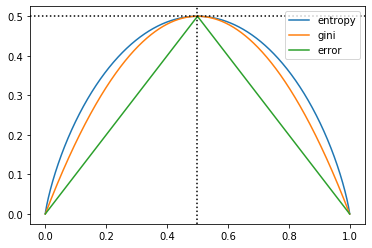

In [95]:
# 假设二分类
# 计算熵
def cal_entropy(p_list):
    e = 0
    for p in p_list:
        e += (-p * math.log2(p))
    return e / 2
# gini
def gini(p_list):
    g = 0
    for p in p_list:
        g += p * p
    return 1 - g
# gini，熵与分类错误率关系
l = np.random.random(10000)
l.sort()
x = []
y_entropy = []
y_gini = []
# 分类误差率 = 1 - p ,error得<0.5
y_error = []
for i in l:
    x.append(i)
    y_entropy.append(cal_entropy([i, 1-i]))
    y_gini.append(gini([i, 1-i]))
    if i > 0.5:
        y_error.append(1 - i)
    else:
       y_error.append(i)   
plt.plot(x, y_entropy, label="entropy")
plt.plot(x, y_gini, label="gini")
plt.plot(x, y_error, label="error")
plt.axvline(0.5, ls='dotted', color='k')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.legend()
plt.show()

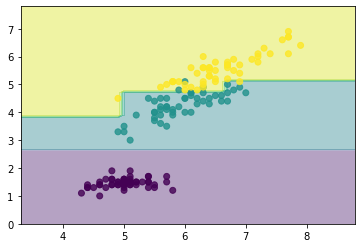

In [96]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier


# 仍然使用自带的iris数据
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# 画图
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.show()

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

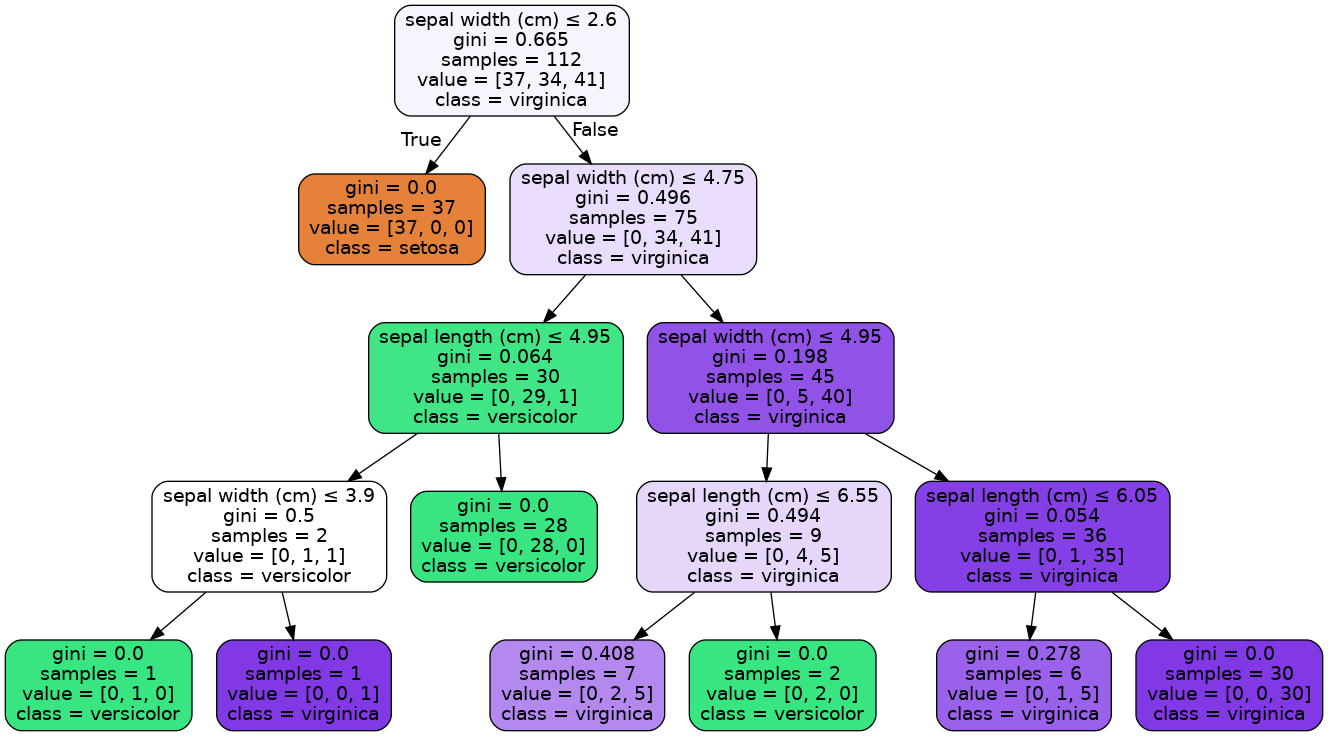

In [98]:
# 训练模型，限制树的最大深度4
clf = DecisionTreeClassifier(max_depth=4)
#拟合模型
clf.fit(X_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names[0:2],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [112]:
clf.feature_importances_

array([0.05026136, 0.94973864])

In [123]:
# The predicted class probability is the fraction of samples of the same class in a leaf.
clf.predict_proba(X_train[0].reshape(1, -1))

array([[0., 1., 0.]])

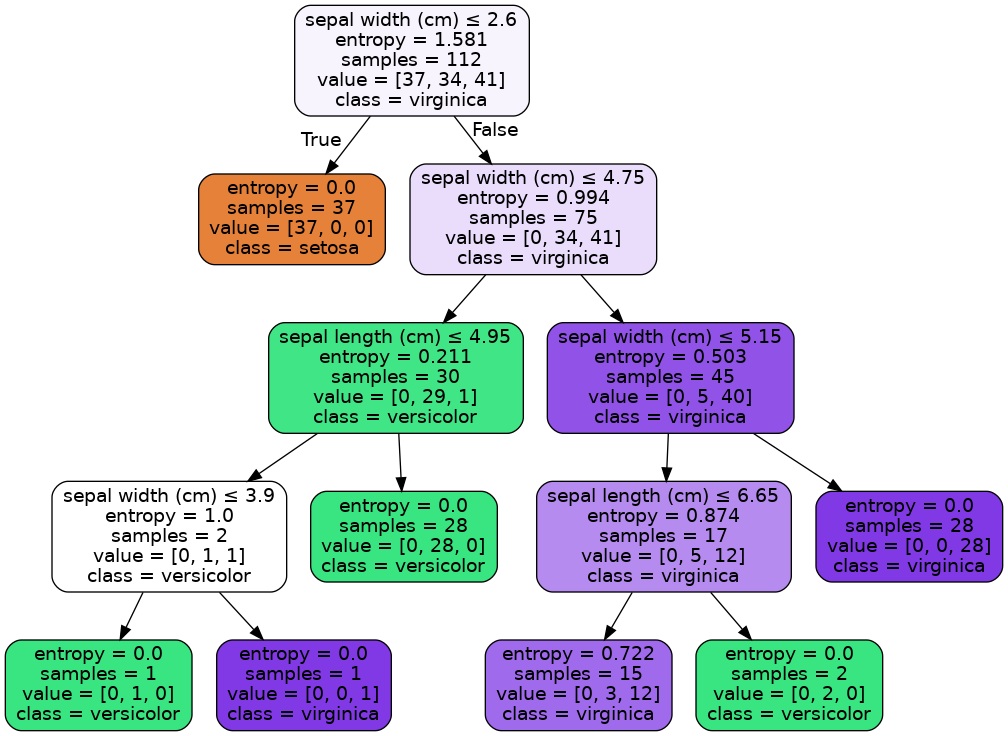

In [100]:
# 训练模型，限制树的最大深度4:熵
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
#拟合模型
clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names[0:2],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [101]:
# 预剪枝：参考 https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [107]:
# 后剪枝：需要用测试集准确率


In [127]:
# 使用交叉验证选择模型: cross_val_score参考：https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X, y, cv=10)

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.8       , 0.93333333, 0.93333333, 1.        , 0.93333333])

In [130]:
# 后续可以从：5个预剪枝参数设置，做cross_val_score，选择分数最高的参数做模型